Goal- To classify shoe images into Boots, Sandals & Slippers

In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train = 'gdrive/MyDrive/data-files/shoe_classification/train'
test = 'gdrive/MyDrive/data-files/shoe_classification/test'

Lets see the count of Boots, Sandals & slippers in train set

In [4]:
train_boots = train+"/Boots/"
train_sandals = train+"/Sandals/"
train_slippers = train+"/Slippers/"

In [5]:
no_of_boots = len(os.listdir(train_boots))
no_of_sandals = len(os.listdir(train_sandals))
no_of_slippers = len(os.listdir(train_slippers))

print('No. of Boots images - ', no_of_boots)
print('No. of Sandals images - ', no_of_sandals)
print('No. of Slippers images - ', no_of_slippers)

No. of Boots images -  326
No. of Sandals images -  306
No. of Slippers images -  146


In [6]:
train_counts =[no_of_boots, no_of_sandals, no_of_slippers]
labels =['Boots', 'Sandals', 'Slippers']

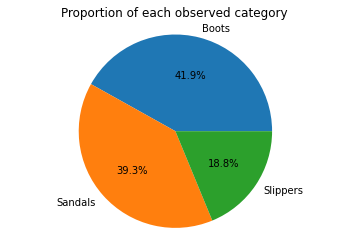

In [7]:
plt.pie(train_counts,
        labels=labels,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

Lets Display some images from each class

Boots

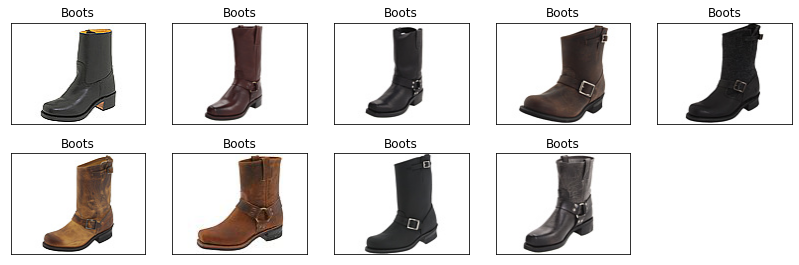

In [8]:
fig = plt.figure(figsize=(14, 14))
images = [file for file in os.listdir(train_boots)]

for cnt, data in enumerate(images[1:10]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(train_boots+data)
    y.imshow(img)
    plt.title('Boots')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

Sandals

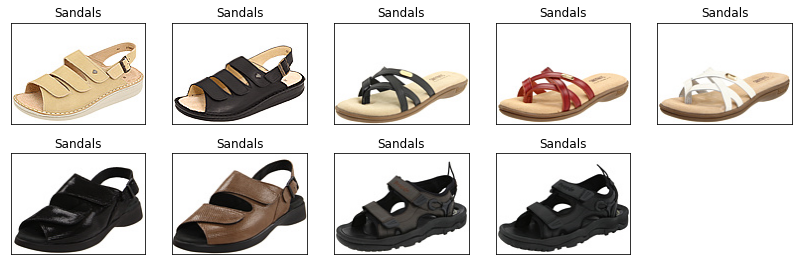

In [9]:
fig = plt.figure(figsize=(14, 14))
images = [file for file in os.listdir(train_sandals)]

for cnt, data in enumerate(images[1:10]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(train_sandals+data)
    y.imshow(img)
    plt.title('Sandals')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

Slippers

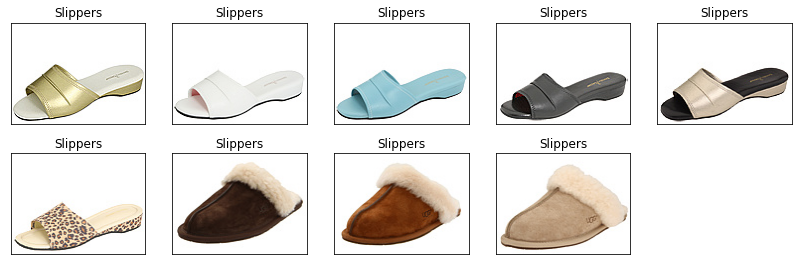

In [10]:
fig = plt.figure(figsize=(14, 14))
images = [file for file in os.listdir(train_slippers)]

for cnt, data in enumerate(images[1:10]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(train_slippers+data)
    y.imshow(img)
    plt.title('Slippers')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

Splitting Train into train and validation


Creating Train & validation directory for splitting train data into train & validation. So that it will be usefull for ImageDataGeneration

In [21]:
path = "gdrive/MyDrive/data-files/shoe_classification/"

train_generator = path+"train_generator"
os.mkdir(train_generator)

validation_generator = path+"validation_generator"
os.mkdir(validation_generator)


Creating sub folders in Train Generator directory i.e Boots, Sandals & Slippers

In [22]:
train_generator_boot = train_generator+"/Boots"
os.mkdir(train_generator_boot)

train_generator_sandals = train_generator+"/Sandals"
os.mkdir(train_generator_sandals)

train_generator_slippers = train_generator+"/Slippers"
os.mkdir(train_generator_slippers)

Creating sub folders in Validation Generator directory i.e Boots, Sandals & Slippers

In [13]:
validation_generator_boot = validation_generator+"/Boots"
os.mkdir(validation_generator_boot)

validation_generator_sandals = validation_generator+"/Sandals"
os.mkdir(validation_generator_sandals)

validation_generator_slippers = validation_generator+"/Slippers"
os.mkdir(validation_generator_slippers)

In [138]:
train_path = 'gdrive/MyDrive/data-files/shoe_classification/train'


Splitting train set into train & validation with 70:30 ratio

In [15]:
tr_boot_size = int(no_of_boots*0.70)
val_boot_size = no_of_boots - tr_boot_size

print(tr_boot_size, val_boot_size)

228 98


In [16]:
tr_sandal_size = int(0.70*no_of_sandals)
val_sandal_size = no_of_sandals - tr_sandal_size

print(tr_sandal_size, val_sandal_size)

214 92


In [17]:
tr_slippers_size = int(0.70*no_of_slippers)
val_slippers_size = no_of_slippers - tr_slippers_size

print(tr_slippers_size, val_slippers_size)

102 44


Copying images from train set to train generation folder

In [24]:
for i in range(tr_boot_size+1):
  if i!=0:
    fname = 'boots ('+str(i)+').jpg'

    src = train_boots + fname
    dst = train_generator_boot + "/"+fname
    shutil.copyfile(src, dst)

In [25]:
for i in range(tr_sandal_size+1):
  if i!=0:
    fname = 'sandals ('+str(i)+').jpg'

    src = train_sandals + fname
    dst = train_generator_sandals + "/"+fname
    shutil.copyfile(src, dst)

In [26]:
for i in range(tr_slippers_size+1):
  if i!=0:
    fname = 'slippers ('+str(i)+').jpg'

    src = train_slippers + fname
    dst = train_generator_slippers + "/"+fname
    shutil.copyfile(src, dst)

Copying images from train set to validation directory

In [27]:
for i in range(tr_boot_size,no_of_boots+1):
  if i!=0:
    fname = 'boots ('+str(i)+').jpg'

    src = train_boots + fname
    dst = validation_generator_boot + "/"+fname
    shutil.copyfile(src, dst)

In [28]:
for i in range(tr_sandal_size,no_of_sandals+1):
  if i!=0:
    fname = 'sandals ('+str(i)+').jpg'

    src = train_sandals + fname
    dst = validation_generator_sandals + "/"+fname
    shutil.copyfile(src, dst)

In [29]:
for i in range(tr_slippers_size,no_of_slippers+1):
  if i!=0:
    fname = 'slippers ('+str(i)+').jpg'

    src = train_slippers + fname
    dst = validation_generator_slippers + "/"+fname
    shutil.copyfile(src, dst)

Clustering the test images

Since test data is unlabelled so we are using transfer learning + Kmeans to cluster the images into 3 classes

In [30]:
import cv2
import os
import glob
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

In [31]:
def get_model(layer='fc2'):
     
    base_model = VGG16(weights='imagenet', include_top=True)
    model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
    return model

In [32]:
img_names =[]
def get_files(path_to_files):
    fn_imgs = []
    
    files = [file for file in os.listdir(path_to_files)]
    for file in files:
      img = cv2.imread(path_to_files+"/"+file)
      img = cv2.resize(img, (224,224))
      fn_imgs.append([file, img])
      img_names.append(file)

    return dict(fn_imgs)

In [33]:
def feature_vector(img_arr, model):
    if img_arr.shape[2] == 1:
      img_arr = img_arr.repeat(3, axis=2)

      # (1, 224, 224, 3)
    arr4d = np.expand_dims(img_arr, axis=0)  
    arr4d_pp = preprocess_input(arr4d)
    return model.predict(arr4d_pp)[0,:]

In [34]:
def feature_vectors(imgs_dict, model):
    f_vect = {}
    for fn, img in imgs_dict.items():
      f_vect[fn] = feature_vector(img, model)
    return f_vect

In [35]:
imgs_dict = get_files(path_to_files = test)

In [36]:
model = get_model()

553476096/553467096 [==============================] - 4s 0us/step


In [37]:
img_feature_vector = feature_vectors(imgs_dict, model)

In [38]:
images = list(img_feature_vector.values())

In [39]:
fns = list(img_feature_vector.keys())

In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(images)
y_kmeans = kmeans.predict(images)
file_names = list(imgs_dict.keys())

In [41]:
kmeans.labels_

array([0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       2], dtype=int32)

In [42]:
image_cluster = pd.DataFrame(img_names,columns=['image'])
image_cluster["clusterid"] = kmeans.labels_
image_cluster 

,image,clusterid
0,image (2).jpg,0
1,image (3).jpg,0
2,image (4).jpg,0
3,image (1).jpg,1
4,image (5).jpg,1
...,...,...
84,image (85).jpg,2
85,image (86).jpg,1
86,image (87).jpg,1
87,image (88).jpg,1


I have created a folder manually to save the cluster classes

In [48]:
n_clusters = 3
cluster_path = 'gdrive/MyDrive/data-files/shoe_classification/cnn_shoe_clusters/'

Creating subfolders under clusterpath & storing clusters in seperate folders

In [49]:
for c in range(0,n_clusters):
    if not os.path.exists(cluster_path+'cluster_'+str(c)):
        os.mkdir(cluster_path+'cluster_'+str(c))

In [50]:
for fn, cluster in zip(file_names, y_kmeans):
    image = cv2.imread(test+'/'+fn)
    cv2.imwrite(cluster_path+'cluster_'+str(cluster)+'/'+fn, image)

In [51]:
cluster0_path = cluster_path+'cluster_0/'
cluster1_path = cluster_path+'cluster_1/'
cluster2_path = cluster_path+'cluster_2/'

Lets analyse each cluster by displaying the imges cluster wise

In [55]:
clust0_size = len(os.listdir(cluster0_path))
clust0_size

31

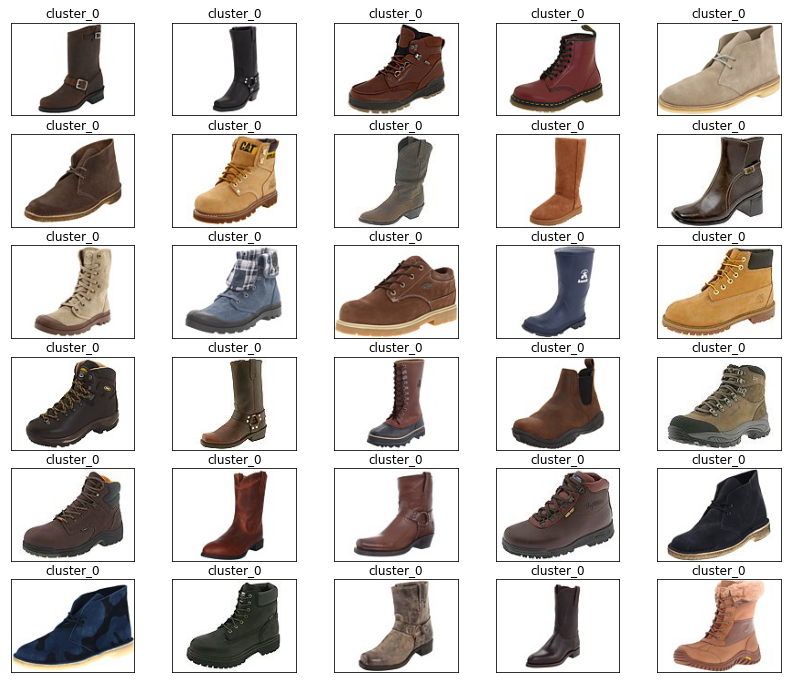

In [56]:
fig = plt.figure(figsize=(14, 14))

images = [file for file in os.listdir(cluster0_path)]

for cnt, data in enumerate(images[1:clust0_size+1]):
#     print(data)
    y = fig.add_subplot(7, 5, cnt+1)
    img = mpimg.imread(cluster0_path+data)
    y.imshow(img)
    plt.title('cluster_0')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

Cluster0 contains 31 images of all Boots

In [58]:
clust1_size = len(os.listdir(cluster1_path))
clust1_size

26

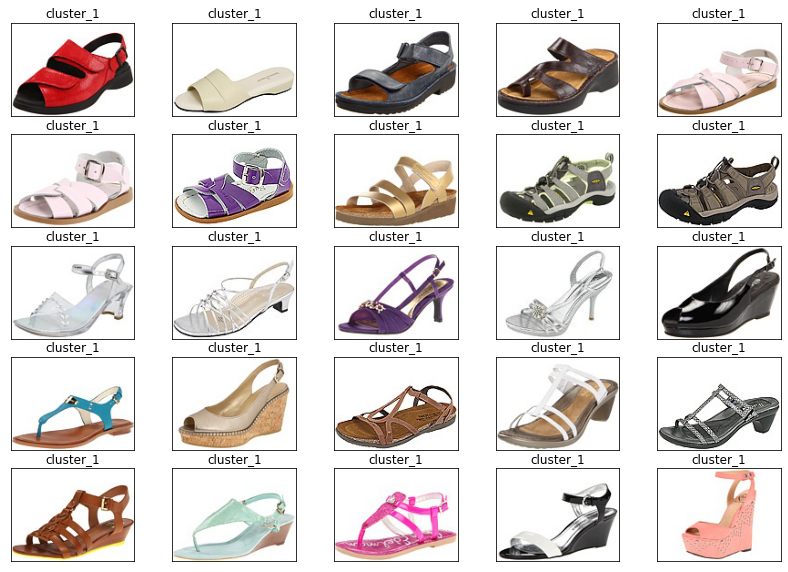

In [59]:
fig = plt.figure(figsize=(14, 14))
images = [file for file in os.listdir(cluster1_path)]

for cnt, data in enumerate(images[1:clust1_size+1]):
#     print(data)
    y = fig.add_subplot(7, 5, cnt+1)
    img = mpimg.imread(cluster1_path+data)
    y.imshow(img)
    plt.title('cluster_1')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

Cluster1 contains 26 images of all Sandals

In [60]:
clust2_size = len(os.listdir(cluster2_path))
clust2_size

32

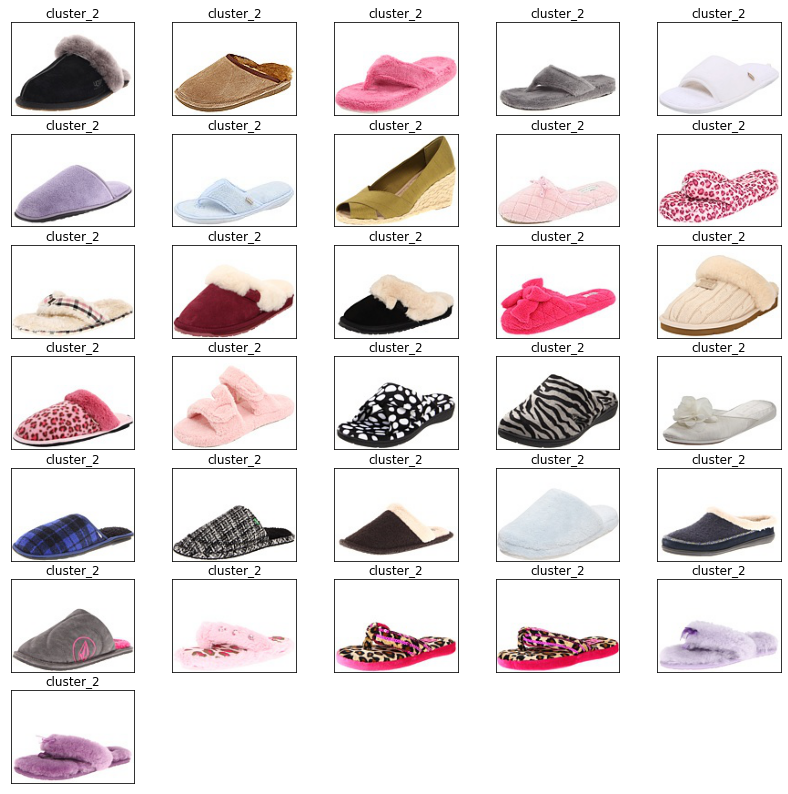

In [61]:
fig = plt.figure(figsize=(14, 14))
images = [file for file in os.listdir(cluster2_path)]

for cnt, data in enumerate(images[1:clust2_size+1]):
#     print(data)
    y = fig.add_subplot(7, 5, cnt+1)
    img = mpimg.imread(cluster2_path+data)
    y.imshow(img)
    plt.title('cluster_2')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

Cluster2 contains total 32 images. Out of which 31 are of Slippers & 1 image which is of Sandal is misclassified as Slippers

Cross checking the no of images

In [62]:
len(os.listdir(cluster0_path))+len(os.listdir(cluster1_path))+len(os.listdir(cluster2_path))

89

Upon checking the cluster2 directory image (56).jpg is found to be the misclassied image. so manually copying it into correct cluster class

In [63]:
src = cluster2_path + 'image (56).jpg'
dst = cluster1_path + 'image (56).jpg'
shutil.copyfile(src, dst)

'gdrive/MyDrive/data-files/shoe_classification/cnn_shoe_clusters/cluster_1/image (56).jpg'

After copying deleting it from Cluster2

In [64]:
os.remove(cluster2_path+ 'image (56).jpg')

Renaming Clusters with proper names

In [65]:
os.rename(cluster0_path,cluster_path+"Boots")
os.rename(cluster1_path,cluster_path+"Sandals")
os.rename(cluster2_path,cluster_path+"Slippers")


Merging all subfolders(Boots, Sandals, Slippers) of TrainGenerator, ValidationGenerator & TestCluster 

In [66]:
class_names = ['Boots', 'Sandals', 'Slippers']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [67]:
class_names_label

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [70]:
from sklearn.utils import shuffle            
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [71]:
def load_data():
    
    datasets = [train_generator , validation_generator , cluster_path ]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [72]:
(tr_gen_images, tr_gen_labels), (val_gen_images, val_gen_labels), (test_images, test_labels) = load_data()

Loading gdrive/MyDrive/data-files/shoe_classification/train_generator


100%|██████████| 102/102 [00:00<00:00, 277.80it/s]


Loading gdrive/MyDrive/data-files/shoe_classification/validation_generator


100%|██████████| 45/45 [00:00<00:00, 289.17it/s]


Loading gdrive/MyDrive/data-files/shoe_classification/cnn_shoe_clusters/


100%|██████████| 31/31 [00:00<00:00, 351.51it/s]


In [76]:
tr_gen_images.shape

(544, 150, 150, 3)

In [77]:
val_gen_images.shape

(237, 150, 150, 3)

In [78]:
test_images.shape

(89, 150, 150, 3)

Checking the counts of images in TrainGenerator, ValidationGenerator & TestData after merging

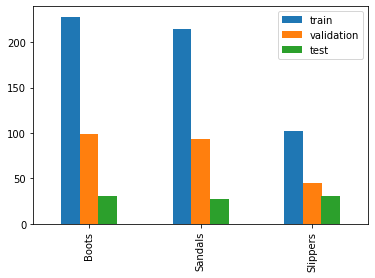

In [79]:
import pandas as pd

_, train_counts = np.unique(tr_gen_labels, return_counts=True)
_, val_counts = np.unique(val_gen_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
              'validation': val_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

Image Data Generator


Since we have less images which is not enough to train data we will make use of ImageDataGenerator to genrate more images

In [80]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [96]:
# All images will be rescaled by 1./255
tr_gen_path = 'gdrive/MyDrive/data-files/shoe_classification/train_generator'
val_gen_path = 'gdrive/MyDrive/data-files/shoe_classification/validation_generator'

tr_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = tr_datagen.flow_from_directory(
        # This is the target directory
        tr_gen_path,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical'
        )


Found 544 images belonging to 3 classes.


In [97]:
validation_generator = val_datagen.flow_from_directory(
        # This is the target directory
        val_gen_path,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical'
        )

Found 237 images belonging to 3 classes.


Creating Sequential model to train our images

In [83]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [139]:
from keras import layers
from keras import models


In [100]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))



In [101]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Training the model with TrainGenerator & validating with ValidationGenerator

In [104]:
history = model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=20)

Epoch 1/15
30/30 [==============================] - 17s 579ms/step - loss: 0.2123 - acc: 0.9422 - val_loss: 0.4922 - val_acc: 0.8667
Epoch 2/15
30/30 [==============================] - 17s 568ms/step - loss: 0.2370 - acc: 0.9433 - val_loss: 0.4362 - val_acc: 0.8883
Epoch 3/15
30/30 [==============================] - 17s 578ms/step - loss: 0.2074 - acc: 0.9410 - val_loss: 0.4228 - val_acc: 0.8800
Epoch 4/15
30/30 [==============================] - 17s 581ms/step - loss: 0.1600 - acc: 0.9600 - val_loss: 0.5506 - val_acc: 0.8650
Epoch 5/15
30/30 [==============================] - 17s 576ms/step - loss: 0.2130 - acc: 0.9411 - val_loss: 0.4937 - val_acc: 0.9083
Epoch 6/15
30/30 [==============================] - 17s 573ms/step - loss: 0.1786 - acc: 0.9533 - val_loss: 0.5575 - val_acc: 0.9133
Epoch 7/15
30/30 [==============================] - 17s 566ms/step - loss: 0.1643 - acc: 0.9556 - val_loss: 0.5937 - val_acc: 0.8667
Epoch 8/15
30/30 [==============================] - 17s 574ms/step - 

In [116]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

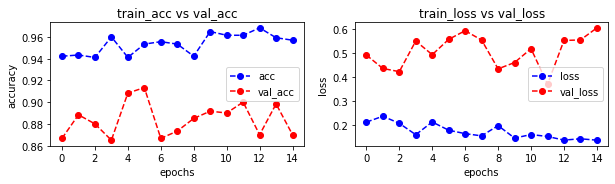

In [117]:
plot_accuracy_loss(history)

It seems training with 11 epochs gives more validation accuracy with less validation loss 

Evaluating Test data on the model

In [118]:
test_loss = model.evaluate(test_images, test_labels)

3/3 [==============================] - 1s 334ms/step - loss: 2408.4624 - acc: 0.3333


In [121]:
test_loss

[2408.46240234375, 0.3333333432674408]

Lets predict test data

In [119]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1)

Lets check the accuracy of test data

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels)

0.9325842696629213

Seems like a good accuracy - 0.9325

Lets check the confusion matrix to understand the mislabelled images

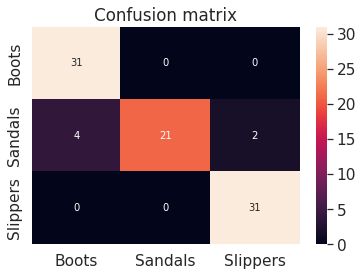

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)

CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Confusion Matrix analysis:


Boots are being predicted wrongly as sandals.

Slippers are being predicted wrongly as Sandals

Lets generate more test data and see the predictions

In [140]:
cluster_path = 'gdrive/MyDrive/data-files/shoe_classification/cnn_shoe_clusters/'
test_generator = val_datagen.flow_from_directory(
        # This is the target directory
        cluster_path,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical'
        )

Found 89 images belonging to 3 classes.


In [142]:
probabilities = model.predict(test_generator, 500)

In [143]:
pred_gen_labels = np.argmax(probabilities, axis = 1)

In [144]:
accuracy_score(test_labels, pred_labels)

0.9325842696629213

Accuracy is still the same with test generator too


**Conclusion**

Since accuracy is same for testgenerator too, from the confusion matrix generated before we can say that more training of Sandals images would improve the accuracy & reduce the mislabelling. Since most mislabelling has happened with Sandals